In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
data = pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# shape of the data
data.shape

(614, 13)

In [4]:
# columns in the data set
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# getting information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# finding null values in the columns
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* In our Loan Prediction data set there is 13 columns and 614 rows.
* 7 columns have null values.
1. Gender
2. Married
3. Dependents
4. Self Employed
5. Loan Amount
6. Loan Amount Term
7. Credit History
* 8 Column's data type is Object.
1. Loan Id
2. Gender
3. Married
4. Dependents
5. Education
6. Self Employed
7. Property Area
8. Loan Status

# Filling Missing Values with EDA

## 1. Gender

In [7]:
# description of Gender Column
data['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [8]:
# discription of Education Column
data['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

<AxesSubplot:xlabel='Education', ylabel='count'>

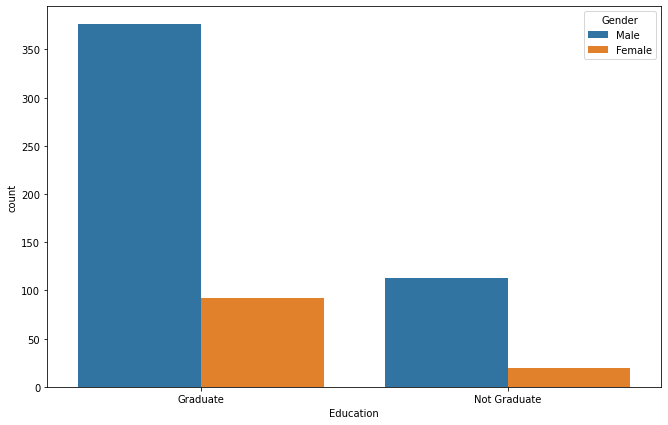

In [9]:
# relation of a person's education with the their Gender
plt.figure(figsize = (11,7))
sns.countplot(x = 'Education', hue = 'Gender', data = data)

From above relation between Gender and Graduation we can see that there is relation between a person's education with respect to their Gender. Female has greater percentage of being graduate than male. So we will fill the the nul values in the Gender column as if a person is graduate we will consider it female and if a person is Not graduate we will consider it as male.

In [10]:
# defining a fill gender function to fill na values in gender according to education.
def fill_gender (col):
    Gender = col[0]
    Education = col[1]
    
    if pd.isnull(Gender):
        if Education == 'Graduate':
            return 'Female'
        else:
            return 'Male'
    else:
        return Gender

In [11]:
data['Gender'] = data[['Gender', 'Education']].apply(fill_gender, axis = 1)

In [12]:
data['Gender'].isna().sum()

0

Now the null values in Gender column has been filled as we defined the function.

## 2. Married

In [13]:
data['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [14]:
data['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

<AxesSubplot:xlabel='Married', ylabel='count'>

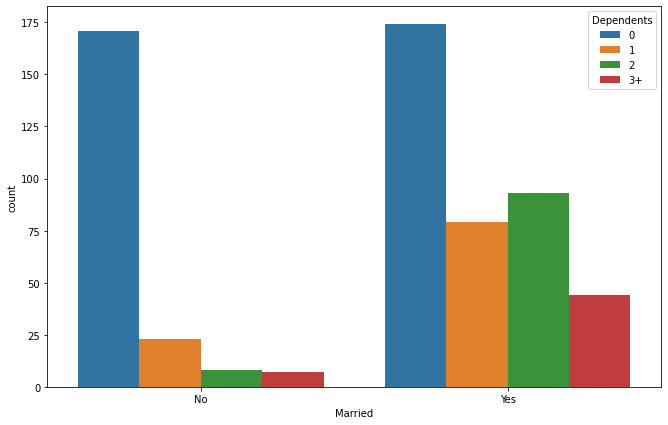

In [15]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Married', hue = 'Dependents', data = data, )

The above countplot describes the relation between a person's marital status with the family member depends upon the person. So we can see that if a person is unmarried than the number dependents upon the person is very less compare to the person who is married. With this relation we can assume that if a person have no dependents member in the family there is high chance that the person is unmarried.

Now keeping this assumption in mind we will describe a function where we will the null values in Married column stating that if a person have 1 or more dependents we will fill the null value as married and if no dependents we will there unmarried.

In [16]:
# defining fill_married function to fill null values in Married column as per dependents upon a person
def fill_married (col):
    Married = col[0]
    Dependents = col[1]
    
    if pd.isnull(Married):
        if Dependents == 0:
            return 'No'
        else:
            return 'Yes'
    else:
        return Married

In [17]:
# applying the defined function to fill the null values in Married column
data['Married'] = data[['Married', 'Dependents']].apply(fill_married, axis = 1)

In [18]:
data['Married'].isna().sum()

0

In [19]:
data['Married'].describe()

count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object

Null values in Married column has been filled as per defined function and we can see that all the null values has filled with YES as the count of YES has increased from 398 to 401 and there were total 3 missed values only which is showing that the all 3 persons whose marital status was missed were having minimum 1 dependents on them.

## 3. Dependents

In [20]:
data['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [21]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

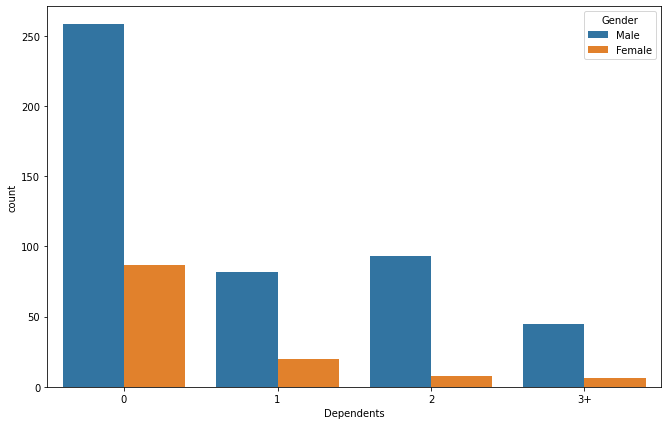

In [22]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Dependents', hue = 'Gender', data = data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

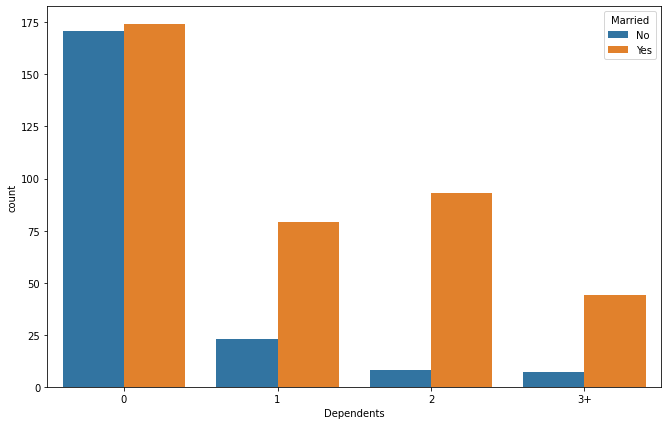

In [23]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Dependents', hue = 'Married', data = data)

The above 2 countplots describe the relation between Dependents of a person with respect to Gender and their marital status. In first countplot we can see that if a person is Female than there is very less chance of having dependents upon them compare to men. And in 2nd countplot we can see that If a person is unmarried than there are very less chance of having dependents on them. So by using these relation between Gender with Dependents & Marital status with Dependents we can define a function to fill the null values in dependents.

By above analysis we can assume that if a person is female and unmarried than there is very high chance to have 0 dependents with them.

In [24]:
def fill_dependents (col):
    Dependents = col[0]
    Gender = col[1]
    Married = col[2]
    
    if pd.isnull(Dependents):
        if Gender == 'Female':
            if Married == 'No':
                return 0
            else:
                return 1
        if Gender == 'Male':
            if Married == 'No':
                return 1
            else:
                return 2
    else:
        return Dependents
            

In [25]:
data['Dependents'] = data[['Dependents', 'Gender', 'Married']].apply(fill_dependents, axis = 1)

In [26]:
data['Dependents'].isna().sum()

0

In [27]:
data['Dependents'].describe()

count     614
unique      7
top         0
freq      345
Name: Dependents, dtype: object

In [28]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
2      10
1       3
0       2
Name: Dependents, dtype: int64

We have successfully filled the null values with the defined function. The function was defined as if a person is female and unmarried the no. of dependents is 0 if female and married, dependents would be 1. If a person is male and unmarried than no. of dependents would be 1 if male and married no. of dependents would be 2.

## 4. Self Employed

In [29]:
data['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [30]:
data['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

<AxesSubplot:xlabel='Education', ylabel='count'>

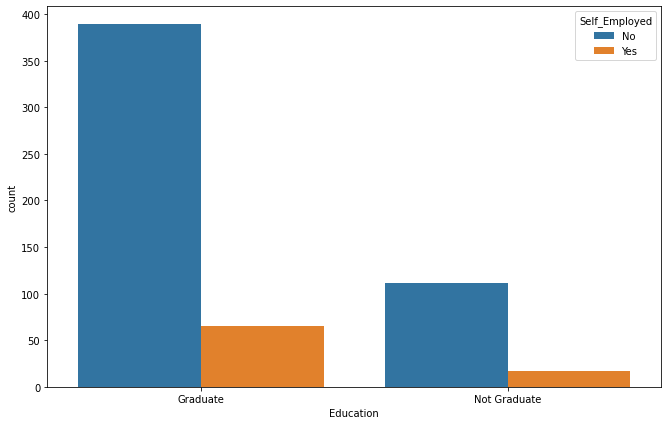

In [31]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Education', hue = 'Self_Employed', data = data)

The above countplot describes the relation between a person's employement with respect to their education and in the relation we can see that self employed person who are not graduate are very less compare to the self employed person who are graduate that means the probability of being self employed is more when person is graduate and less when person is not graduate but we also can see that probability of being self employed itself is very less compare to those who are employed.

And if we check the ratio of employed and self employed in both graduate and not graduate we find that ratio of employed person to the self person in graduate is more that means the probability of being employed is more than being self employed when a person is graduate.

So we are going to define a function which will fill the null values in self employed column on the basis of if a person is graduate that will go with the employed and if not graduate that will go with self employed.

In [32]:
def fill_self_emp (col):
    Self_Employed = col[0]
    Education = col[1]
    
    if pd.isnull(Self_Employed):
        if Education == 'Graduate':
            return 'No'
        else:
            return 'Yes'
    else:
        return Self_Employed

In [33]:
data['Self_Employed'] = data[['Self_Employed', 'Education']].apply(fill_self_emp, axis = 1)

In [34]:
data['Self_Employed'].isna().sum()

0

In [35]:
data['Self_Employed'].describe()

count     614
unique      2
top        No
freq      526
Name: Self_Employed, dtype: object

Null values in Self_Employed column has been filled with the defined function. Out of 32 null values 26 has filled with No and 6 values filled with Yes as we defined function with respect to the education, No if person is Graduate, Yes if person is Not Graduate.

## 5. LoanAmount

In [36]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [37]:
data['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [38]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

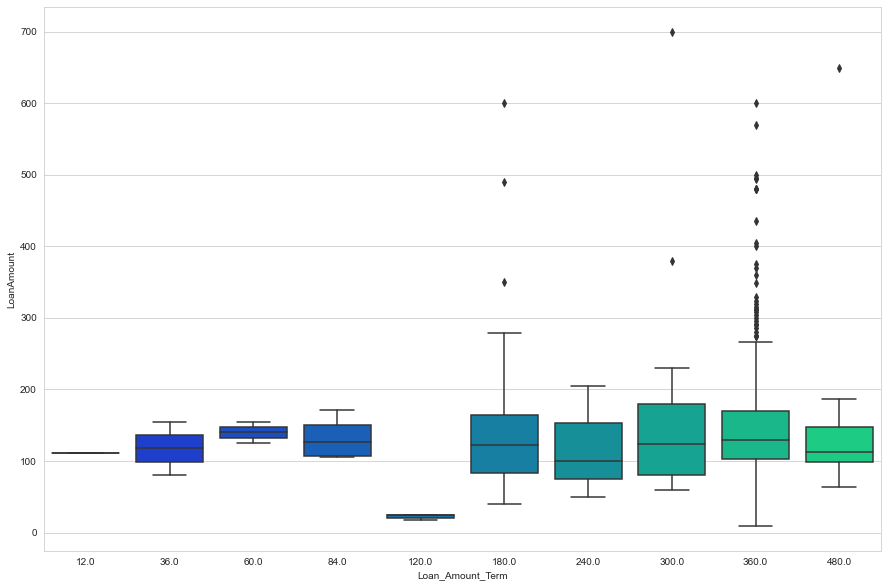

In [39]:
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')
sns.boxplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data = data, palette = 'winter')

The above boxplot describes the relation between Loan_Amount_Term and LoanAmount. Here we trying to interpret the amount of loan based on the term of loan to fill the null values in Loan amount column. we will fill the null values in LoanAmount column based on the term of loan amount(Mean of loanAmount based on each Loan_Amount_Term).

In [40]:
# defining fill_loan_amount column to fill null values in LoanAmount column as per Loan_Amount_Term
def fill_loan_amount (col): 
    LoanAmount = col[0]
    Loan_Amount_Term = col[1]
    
    if pd.isnull(LoanAmount):
        if Loan_Amount_Term == 12:   
            return 110                    # returning the estimated mean value at loan term 12
        if Loan_Amount_Term == 36:
            return 115                    # returning the estimated mean value at loan term 36
        if Loan_Amount_Term == 60:
            return 140                    # returning the estimated mean value at loan term 60
        if Loan_Amount_Term == 84:
            return 120                    # returning the estimated mean value at loan term 84
        if Loan_Amount_Term == 120:
            return 25                     # returning the estimated mean value at loan term 120
        if Loan_Amount_Term == 180:
            return 119                    # returning the estimated mean value at loan term 180
        if Loan_Amount_Term == 240:
            return 100                    # returning the estimated mean value at loan term 240
        if Loan_Amount_Term == 300:
            return 125                    # returning the estimated mean value at loan term 300
        if Loan_Amount_Term == 360:
            return 130                    # returning the estimated mean value at loan term 360
        else:
            return 113                    # returning the estimated mean value at loan term 480
    else:
        return LoanAmount                 # returning the original values where there is no null values

In [41]:
# applying defined function to the LoanAmount column to fill the null values
data['LoanAmount'] = data[['LoanAmount', 'Loan_Amount_Term']].apply(fill_loan_amount, axis = 1)

In [42]:
# rechecking the null values
data['LoanAmount'].isnull().sum()

0

Missing values in LoanAmount column has been filled as per defined function. Now we can see no missing values in the LoanAmount column.

## 6. Loan_Amount_Term

In [43]:
data['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [44]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

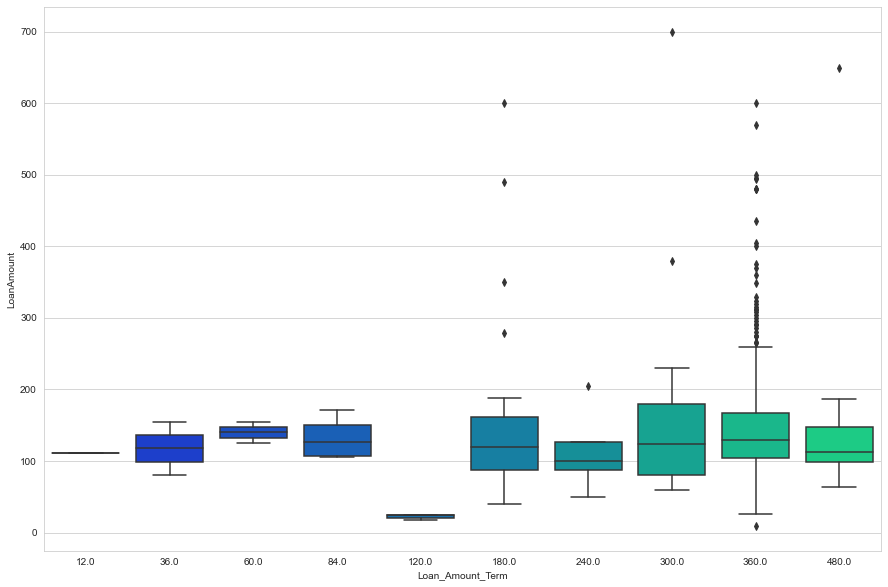

In [45]:
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')
sns.boxplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data = data, palette = 'winter')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

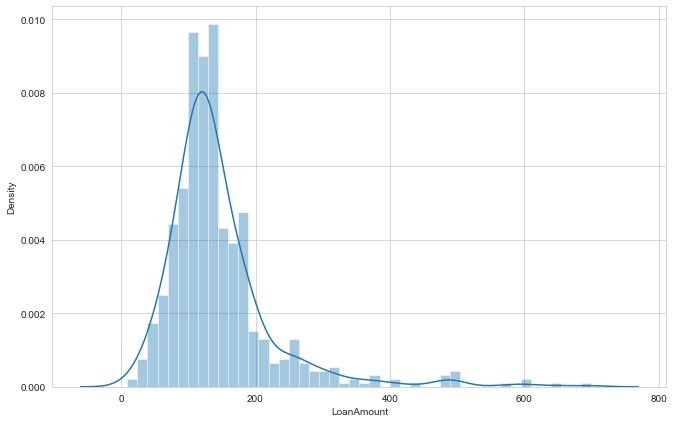

In [46]:
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.distplot(data['LoanAmount'])

While filling the null values in LoanAmount column we analysed the relation between LoanAmount and Loan_Amount_Term and we filled the null values in LoanAmount column with respect to it's relation with Loan_Amount_Term, similarly using the same relation we can fill the null values in Loan_Amount_Term column as well for this we have to define a function where we will use range function in Loan amount and will define a certain mean range of LoanAmount with respect to it's relation with Loan_Amount_Term.

In [47]:
def fill_loan_term (col):
    Loan_Amount_Term = col[0]
    LoanAmount = col[1]
    
    if pd.isnull(Loan_Amount_Term):
        if LoanAmount <=35:
            return 120
        if 35 < LoanAmount <=50:
            return 180
        if 50 < LoanAmount <= 70:
            return 240
        if 70 < LoanAmount <= 90:
            return 300
        if 90 < LoanAmount <= 200:
            return 360
        else:
            return 480
    else:
        return Loan_Amount_Term

In [48]:
data['Loan_Amount_Term'] = data[['Loan_Amount_Term', 'LoanAmount']].apply(fill_loan_term, axis = 1)

In [49]:
data['Loan_Amount_Term'].isna().sum()

0

We have filled the null values in Loan_Amount_Term column with a defined function created with relation of Loan_Amount_Term and LoanAmount. In this function we have defined a logic related to loan amount and term of loan amount where we have filled the null values as 120 if loan amount is between 0 to 35 because we can see in value counts of Loan_Amount_Term that 12, 36, 60 and 84 days term's frequencies are very less so we haven't consider these in filling null values even 120 and 240 day's frequency is less but assuming the realistic value that if the loan amount is between 0 to 35 fill it with 120 loan term as we went ahead keeping this realistic theory in mind, between 35 to 50 loan amount we defined it to fill the term as 180 days and it goes like this.

We have also seen that the 360 days have maximum frequency and that is 512 out of 614 and the most of loan which was applied is between 90 to 200 so we defined to fill null value as 360 if the loan amount is between 90 to 200. more than 200 it is going to fill 480 days.

## 7. Credit_History

In [50]:
data['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [51]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [52]:
data['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

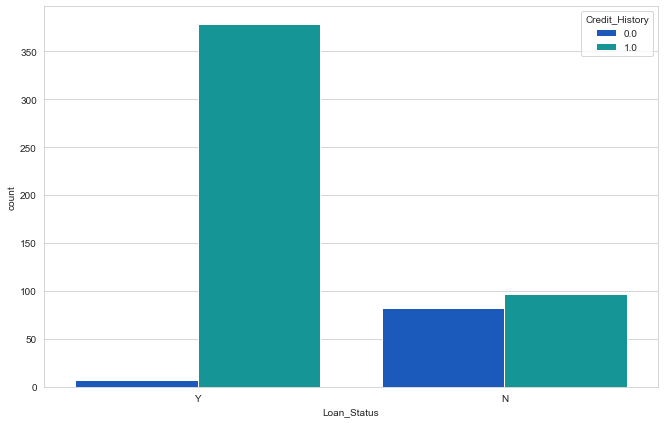

In [53]:
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Credit_History', data = data, palette = 'winter')

The above countplot describes the relation between a person's credit history with respect to the loan status and we can see clearly that if a person's credit history is 0 than approval of their loan status is very very low and at other side deniel of their loan status is high and has very less difference with those whose credit history is 1.

So we will define a fill_credit_history function to where we will fill null values with 0 if the loan status is N and 1 if Loan_Status is Y.

In [54]:
def fill_credit_history (col):
    Credit_History = col[0]
    Loan_Status = col[1]
    
    if pd.isnull(Credit_History):
        if Loan_Status == 'N':
            return 0.0
        else:
            return 1.0
    else:
        return Credit_History

In [55]:
data['Credit_History'] = data[['Credit_History', 'Loan_Status']].apply(fill_credit_history, axis = 1)

In [56]:
data['Credit_History'].isnull().sum()

0

In [57]:
data['Credit_History'].value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

The Null values in Credit_History column has been filled with the defined function and we can see that out of 50 null values 37 values have been filled with 1.0 and 13 values have been filled with 0.0

In [58]:
# rechecking the null values in data set
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have solved the issue of null values in our data set now we can see that we do not have any null values in our data set. Now we will resolve the issue of object data type by encoding techniques because we can not send object data type's column into machine learning model as it won't work in machine learning algorithms.

# Encoding

In [59]:
# replacing all 3+ with 3 as 3+ is an object data type we need to convert it into integer
data['Dependents'] = data['Dependents'].replace('3+', 3)

In [60]:
# all the numbers present in the column is string data type replacing them with same integer data type
data['Dependents'] = data['Dependents'].replace('0',0)
data['Dependents'] = data['Dependents'].replace('1', 1)
data['Dependents'] = data['Dependents'].replace('2',2)

In [61]:
data['Dependents'].value_counts()

0    347
2    111
1    105
3     51
Name: Dependents, dtype: int64

In Dependents column all the data was in string format though they are numbers but the data was captured in this column as string format we have changed them into integers by replacing the same string numbers into integers we also have converted 3+ family members as 3 the maximum would 3 family members and 3+ will be assumed as 3 only.

In [62]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
# ordinal encoding of feature columns and label encoding of Label column
ord_enc = OrdinalEncoder()
lab_enc = LabelEncoder()
Gender = ord_enc.fit_transform(data['Gender'].values.reshape(-1,1))
Married = ord_enc.fit_transform(data['Married'].values.reshape(-1,1))
Education = ord_enc.fit_transform(data['Education'].values.reshape(-1,1))
Self_Employed = ord_enc.fit_transform(data['Self_Employed'].values.reshape(-1,1))
Property_Area = ord_enc.fit_transform(data['Property_Area'].values.reshape(-1,1))
Loan_Status = lab_enc.fit_transform(data['Loan_Status'])

In [64]:
# instantiating the encoded column into main data frame
data['Gender'] = Gender
data['Married'] = Married
data['Education'] = Education
data['Self_Employed'] = Self_Employed
data['Property_Area'] = Property_Area
data['Loan_Status'] = Loan_Status

In [65]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents             int64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

In [66]:
# droping the Loan_ID column as we don't need Loan ID column to predict the loan status
data = data.drop(columns = ['Loan_ID'])

In [67]:
data.dtypes

Gender               float64
Married              float64
Dependents             int64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

In Encoding part Our motive was to convert all the object data types column into float or integer data type column for our machine learning model.

First we noticed that Dependent column has 4 category numeric value that was 0,1,2 & 3+. So we decided to convert all the 3+ numbers into 3 only. than we observed that all the other numeric values are in string formate under Dependents column so we replaced the string numeric value into same integers value.

After sorting the Dependents column we have encoded all the other object data type columns with Ordinal Encoder and secifically we have encoded the target column with label encoder because ideally label encoder is to encode the Label column.

Than we replaced the object data type column with encoded column in main data frame and also we droped the Loan_ID column from the data set as we don't feel necessary to keep this column for machine learning model building as it don't play any part in prediction of loan status. Till here our missing values issue and object data type issue has been resolved. Now our data looks like perfact to analyze further and to move towards the model building.

# Data Visualization & Analysis

To analyze the data first we will saperate the continuous columns and categorical columns and than we will plot the visualization techniques to study the columns in better way.

In [68]:
# separating the continuous and cetegorical column in 2 different data frame df1 for categorical column and df2 for continuous column

df1 = data.drop(columns = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
df2 = data.drop(columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'], axis = 1)

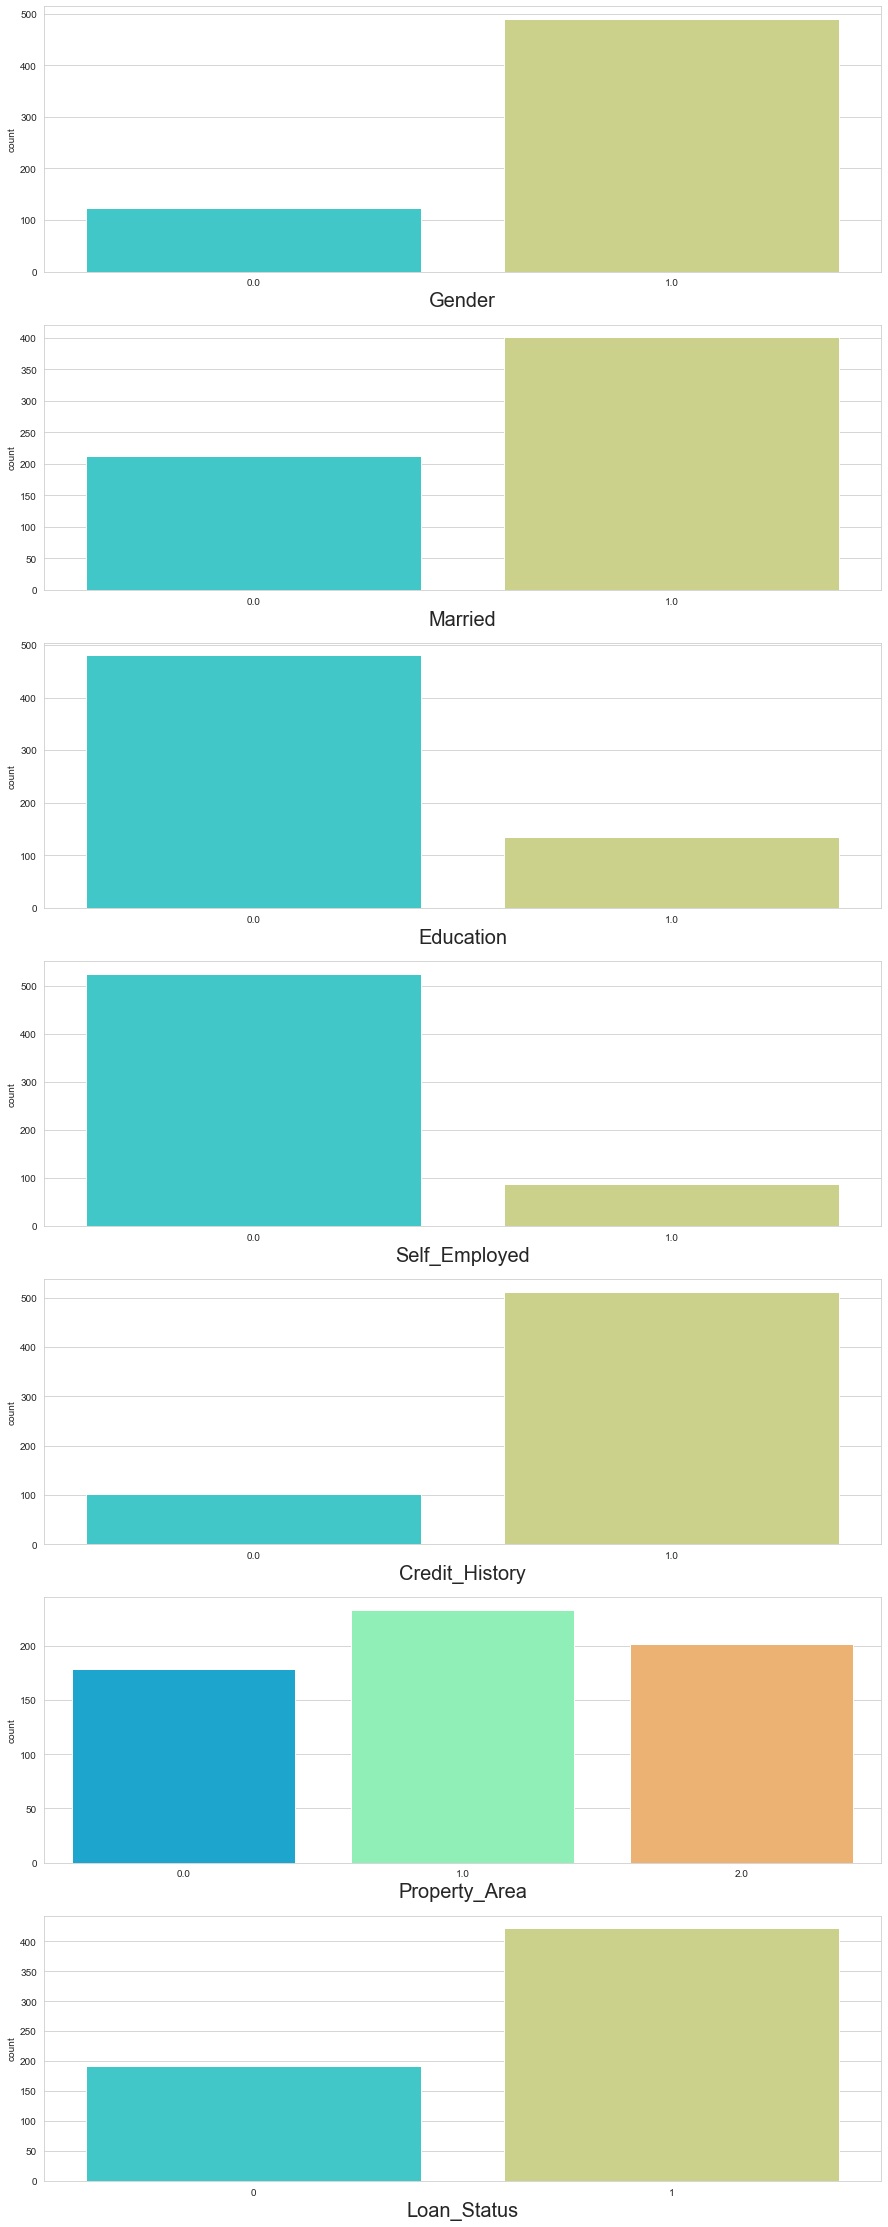

In [69]:
# for loop for countplots of nominal(categorical) data
plt.figure(figsize = (15,40))
plotnumber = 1

for columns in df1:
    if plotnumber <= 7:
        ax = plt.subplot(7,1, plotnumber)
        sns.set_style('whitegrid')
        sns.countplot(df1[columns], palette = 'rainbow')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.show()

Above we have ploted a countplot of all the categorical data with a for loop. The analysis has been obsderved as followes:

### Gender:-
In the data set of Loan prediction Gender column describes the Gender of applicant who applied for loan. In original data set the column's data type was Object and had 2 categories (1) Male & (2) Female, after encoding with ```OrdinalEncoder()``` the categories was converted Male = 1.0 & Female = 0.0. We can see that the applicant who applied for loan are mostly Male 490 out of 614 and 124 out of 614 are Females.

### Married:-
Married column of the data set describes whether the applicant is married or not in the original data set this column's data type was also object data type and has 2 categories (1) Yes & (2) No after encoding the categories got converted into 0.0 = No & 1.0 = Yes and from above plot we can see that number of married(401) applicants are more than the unmarried applicant(213).

### Education:-
Education column of the data set describes whether the applicant who applied for loan is gradute or not, in the original data set the column's data type was object data type and has 2 categories (1) Gradute & (2) Not Graduate, after encoding of the column categories got converted into 0.0 = Graduate & 1.0 = Not Graduate. Most of the applicants are graduate 480 out of 614 and 134 applicants are not graduted.

### Self_Employed:-
Self_Employed column of the data set describes the type of employement of the applicant mainly focused whether an applicant is self employed or not the original data had 2 categories Yes & No after encoding of the column Yes got converted into 1.0 and No got converted into 0.0 and we can see from the countplot that 526 out of 614 applicants are not self employed they are employed under someone else & 88 applicants are self employed.

### Credit_History:-
Credit_History columns describe the past credit history of an applicant in the original dataset this column's data type was float data type and had 2 categories 0.0 for no credit history means the applicant haven't any type of credits or loans or EMI's from any financial institutes and the second category is 1.0 for credit history as yes in the past means applicant had got some type of loan in the past from financial institute. In the count plot we can see that 102 out 614 applicant has no credit history in the past no amount of loan or any product on emi has not taken yet. and 512 out 614 applicant has credit histoy as yes they had taken the some kind of loan or product on emi or having credit card.

### Property_Area:-
Property_Area column describes the location of property of applicant it had 3 category originaly, (1) Urban, (2) Rural, (3) Semiurban. whether the property of applicants belongs to urban area, rural area or semiurban area. after encoding of the column categories got converted itno float data type as
* 0.0 = Rural Area
* 2.0 = Urban Area
* 1.0 = Semi Urban Area

From the above count plot we can see that all the categories data has divided kind of normaly 233 applicant's property belongs to semi urban area 202 applicant's property berlongs to urban area and 179 applicant's property belongs to Rural areas.

### Loan_Status:-
Loan_Status column is our target column which we need to predict in machine learning model. This column describes whether an applicant got the applied loan or not it had 2 categories Y & N (Yes & No) Y for approved loan application and N for rejected loan application after encoding the categories got converted into 1 = Y(Yes) & 0 = N(No). from the count plot we can see that 422 application got approvals and 192 application got rejected.

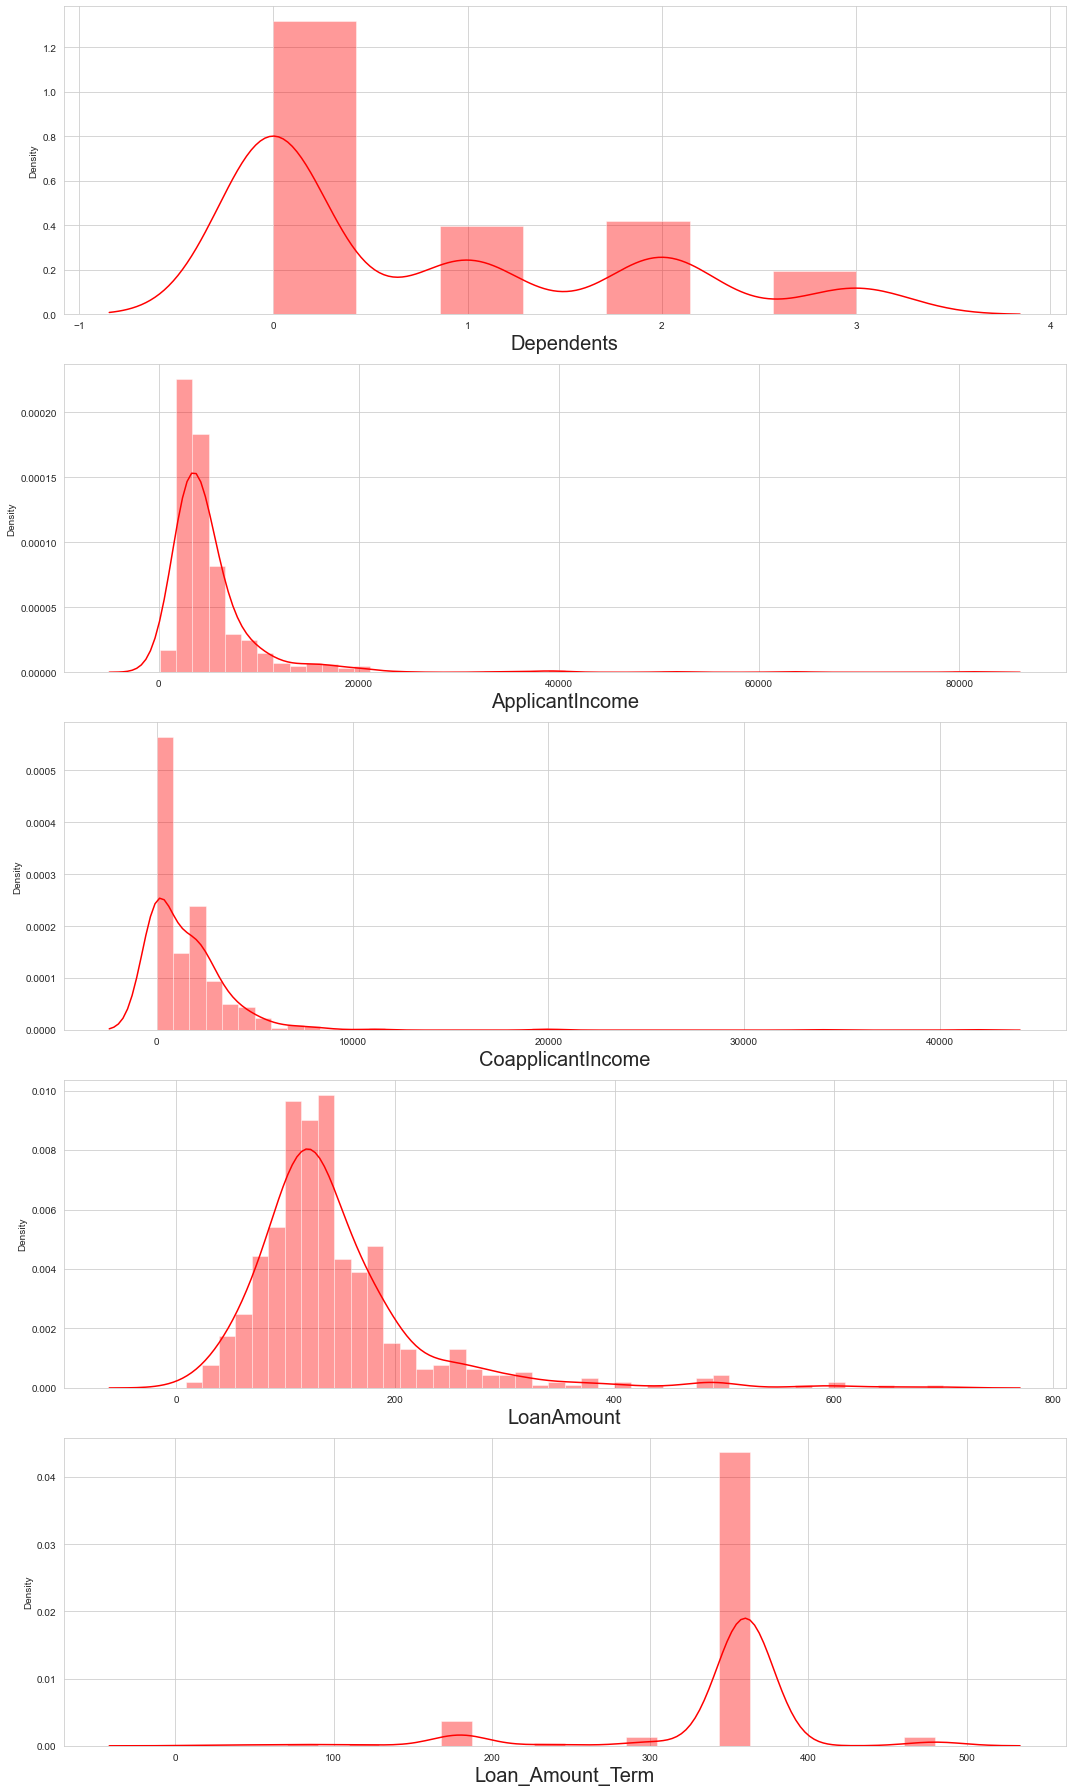

In [86]:
# for loop for distribution plot of continuous columns of the data
plt.figure(figsize = (15,25))
plotnumber = 1

for columns in df2:
    if plotnumber <= 5:
        ax = plt.subplot(5,1, plotnumber)
        sns.set_style('whitegrid')
        sns.distplot(df2[columns], color = 'red')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

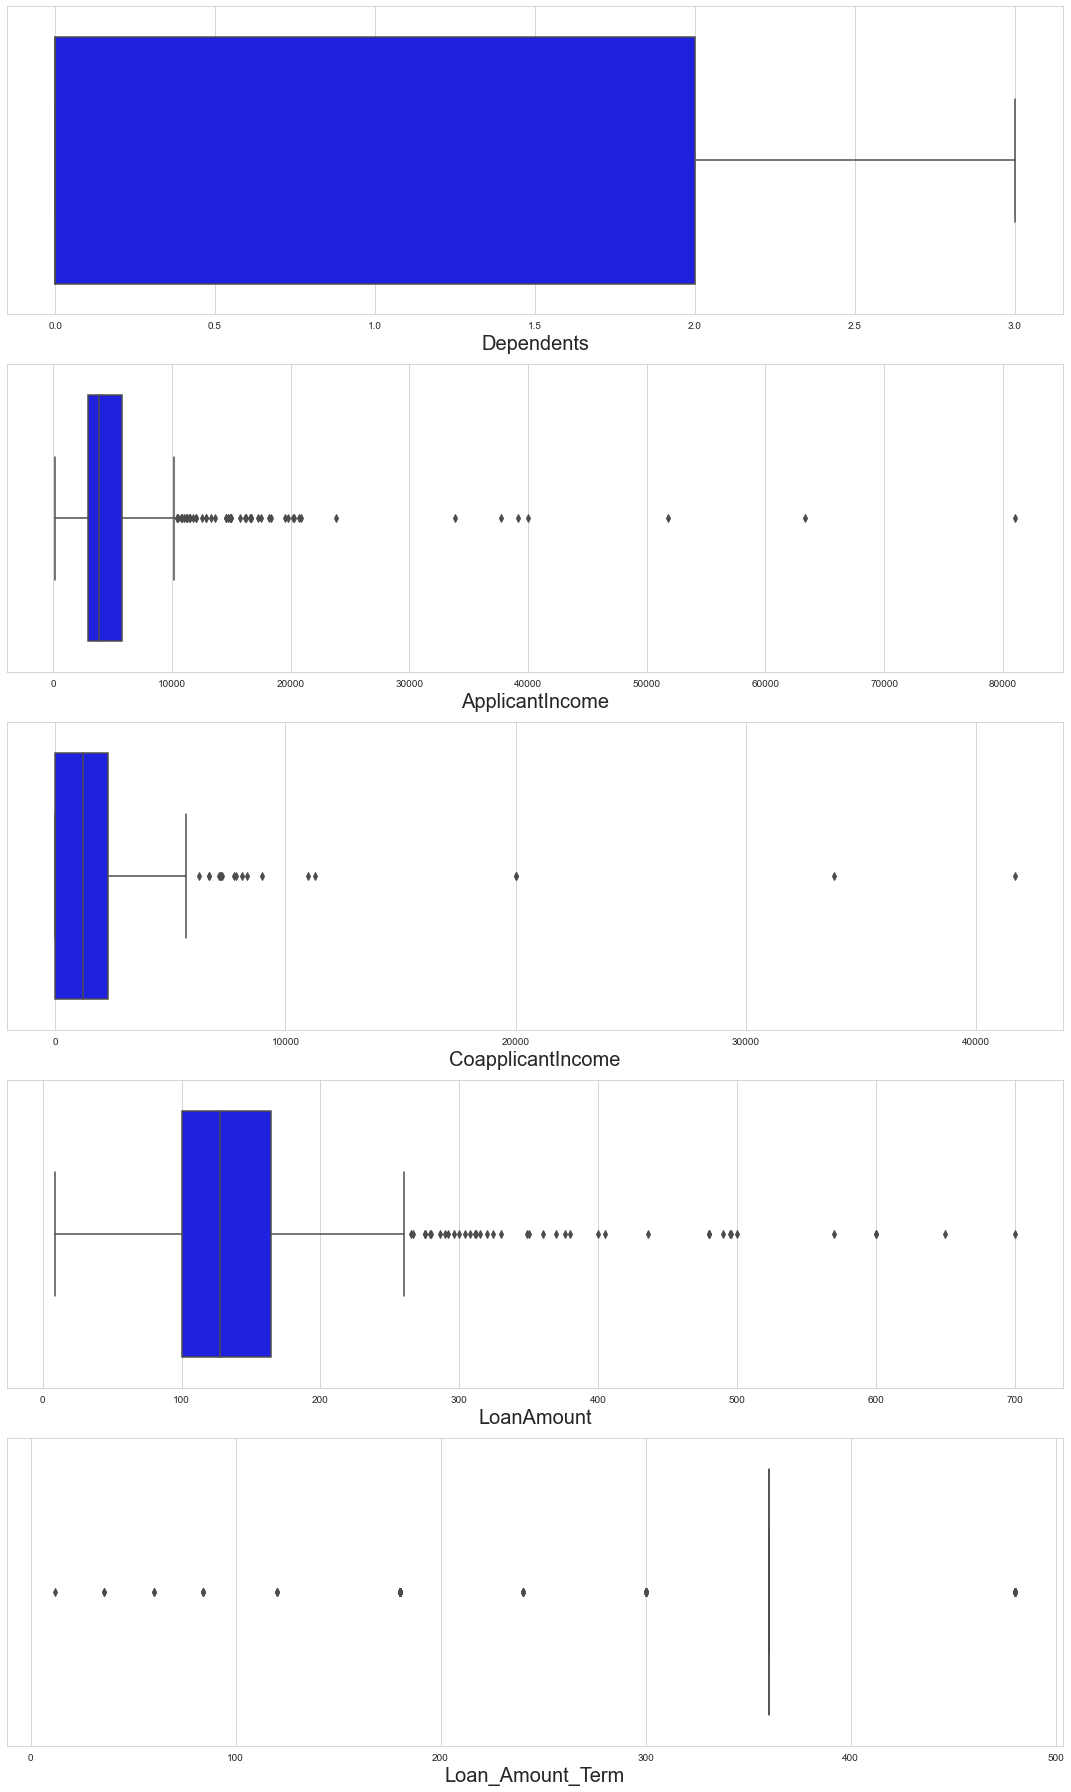

In [87]:
# for loop for the boxplot of the continuous column of the data
plt.figure(figsize = (15,25))
plotnumber = 1

for columns in df2:
    if plotnumber <= 5:
        ax = plt.subplot(5,1, plotnumber)
        sns.set_style('whitegrid')
        sns.boxplot(df2[columns], color = 'blue')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [93]:
df2.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.781759,5403.459283,1621.245798,145.739414,342.019544
std,1.015986,6109.041673,2926.248369,84.119897,64.593796
min,0.000000,150.000000,0.000000,9.000000,12.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000
75%,2.000000,5795.000000,2297.250000,164.750000,360.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000


# Analysis of the continuous columns of the data.

We have plotted the distribution plot and box plot of the continuous column with for loop to further analyse the continuous data of the data set. we have 5 columns with continuous data in our data set.

## Dependents:-
Dependents column describes the dependent family member of the applicant on him/her. this column had minimum value as 0 and highest values as 3+. 0 as no dependents in family 1 & 2 as one dependent and 2 dependent on applicant and 3+ as 3 or more dependents on applicant. After replacing string data type into integer data type we made this column's data type as integer and we also had replaced 3+ with 3 means the maximum dependents on applicant would be considered as 3.
Since this continuous column has only 4 unique values thus it's distribution plot seems like count plot and we can see that dependent as 0 has the highest value means most of the applicant have no dependents on him/her.
The box plot of the column shows that there is no outliers in this column and data seems to be kind of normaly distributed.

## ApplicantIncome:-
ApplcantIncome column describes the income of the applicant individually and the distribution plot of Applicant shows that the data distribution is highly right skewed as upto 75% of the data in this columns lies between 150 to 5795 and 100% data lies upto 10000 approx. but some data points varies upto 81000 which is causing a high right skewness. The boxplot of the column is showing a high amount of outliers above 10000. Also the data description of the applicant income showes the standard deviation is greater than the mean value which clearly tell that the data is messed up so we need to clean this data by removing outliers or skewness we will do this in next step. 

## CoapplicantIncome:-
CoapplicantIncome column describes the income of the person who is applying for the loan along with the applicant means if an applicant is not applying for loan alone rather he/she will take the loan and use it together for common cause and will pay for it by contributing in that case the other person's income is also counted. The data description of this column shows that upto 25% of the data in this column has 0 coapplicant income which means this much of applicant is not taking loan with someone else rather they are applying for loan alone and will pay for it alone. 75% of the data's income are upto 2297, boxplot is showing that 100% data are upto 6000 approx but some data are going till 41667. Distribution plot is showing the column is right skewed and boxplot is showing the outliers above the 6000 approx. standard deviation of this column is almost double of mean value. data needs to be clean.

## LoanAmount:-
Loan Amount column describes the amount of the loan applied by the applicant in the loan application. The distribution plot of the column shows that data is highly right skewed. Most of the data point lies under 200 and varies till 700 hence it is right skewed. The box plot is showing that 100% of the data lies upto 275 and rest are outliers. The data description tell us that minimum amount of loan is 9 and maximum amount of loan is 700 whereas 75% data is upto 164, this again states the skeweness and outliers of the column. Mean of the data is 145 and standard deviation is 84.

## Loan_Amount_Term:-
Loan amount term column describes the time period for which the loan is applied for. In this column all the data is distributed in 10 unique and 523 data ponits belongs to only one value which 360(Almost one year of terms) which makes the rest of the data as outliers values although it is a continuous data. The term is starting from 12 days to 480 days and all the terms has certain gap of months as you can see in practicle worls that loan term is always use to like 6 months 1 years, 1.5 years, 2 years. That is why the loan term has 10 unique values because terms generally do not consist any random day.

# Removing outliers with IQR Method.

In [94]:
# setting the quantiles for the data
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [95]:
index = np.where(data['ApplicantIncome'] > (q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome)))
df = data.drop(data.index[index])
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0,0.0,0.0,5849,0.0,130.0,360.0,1.0,2.0,1
1,1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
560,610,1.0,1.0,3,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1
561,611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1
562,612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1


In [96]:
index = np.where(df['CoapplicantIncome'] > (q3.CoapplicantIncome + (1.5 * iqr.CoapplicantIncome)))
df = df.drop(df.index[index])
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0,0.0,0.0,5849,0.0,130.0,360.0,1.0,2.0,1
1,1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
544,610,1.0,1.0,3,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1
545,611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1
546,612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1


In [98]:
index = np.where(df['LoanAmount'] > (q3.LoanAmount + (1.5 * iqr.LoanAmount)))
df = df.drop(df.index[index])
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0,0.0,0.0,5849,0.0,130.0,360.0,1.0,2.0,1
1,1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,609,0.0,0.0,0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
531,610,1.0,1.0,3,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1
532,611,1.0,1.0,1,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1
533,612,1.0,1.0,2,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1


We have removed the outliers from the columns where outliers exists except the Loan_Amount_Term column I have intentionally not removing the outliers from the Loan_Amount_Term column because in this column more than 90% data belongs to only one values which is making rest of the term timing a oulier if we remove all the outliers from the this column than this column will become a saturated column having only one type of category which will be common for all and hence will play no role in machine learning model.

This column had originally 614 rows and after removing the outliers now there is only 535 rows which is almost 12% data loss ideally we should not move ahead with more than 10% data loss but here I am considering this an exception and moving ahead with 12% data loss.

Now we will recheck the outliers and skewness by ploting the distribution plot and boxplot.

In [100]:
# extracting the continuous columns from the data into df2 data frame.
df2 = df.drop(columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'], axis = 1)

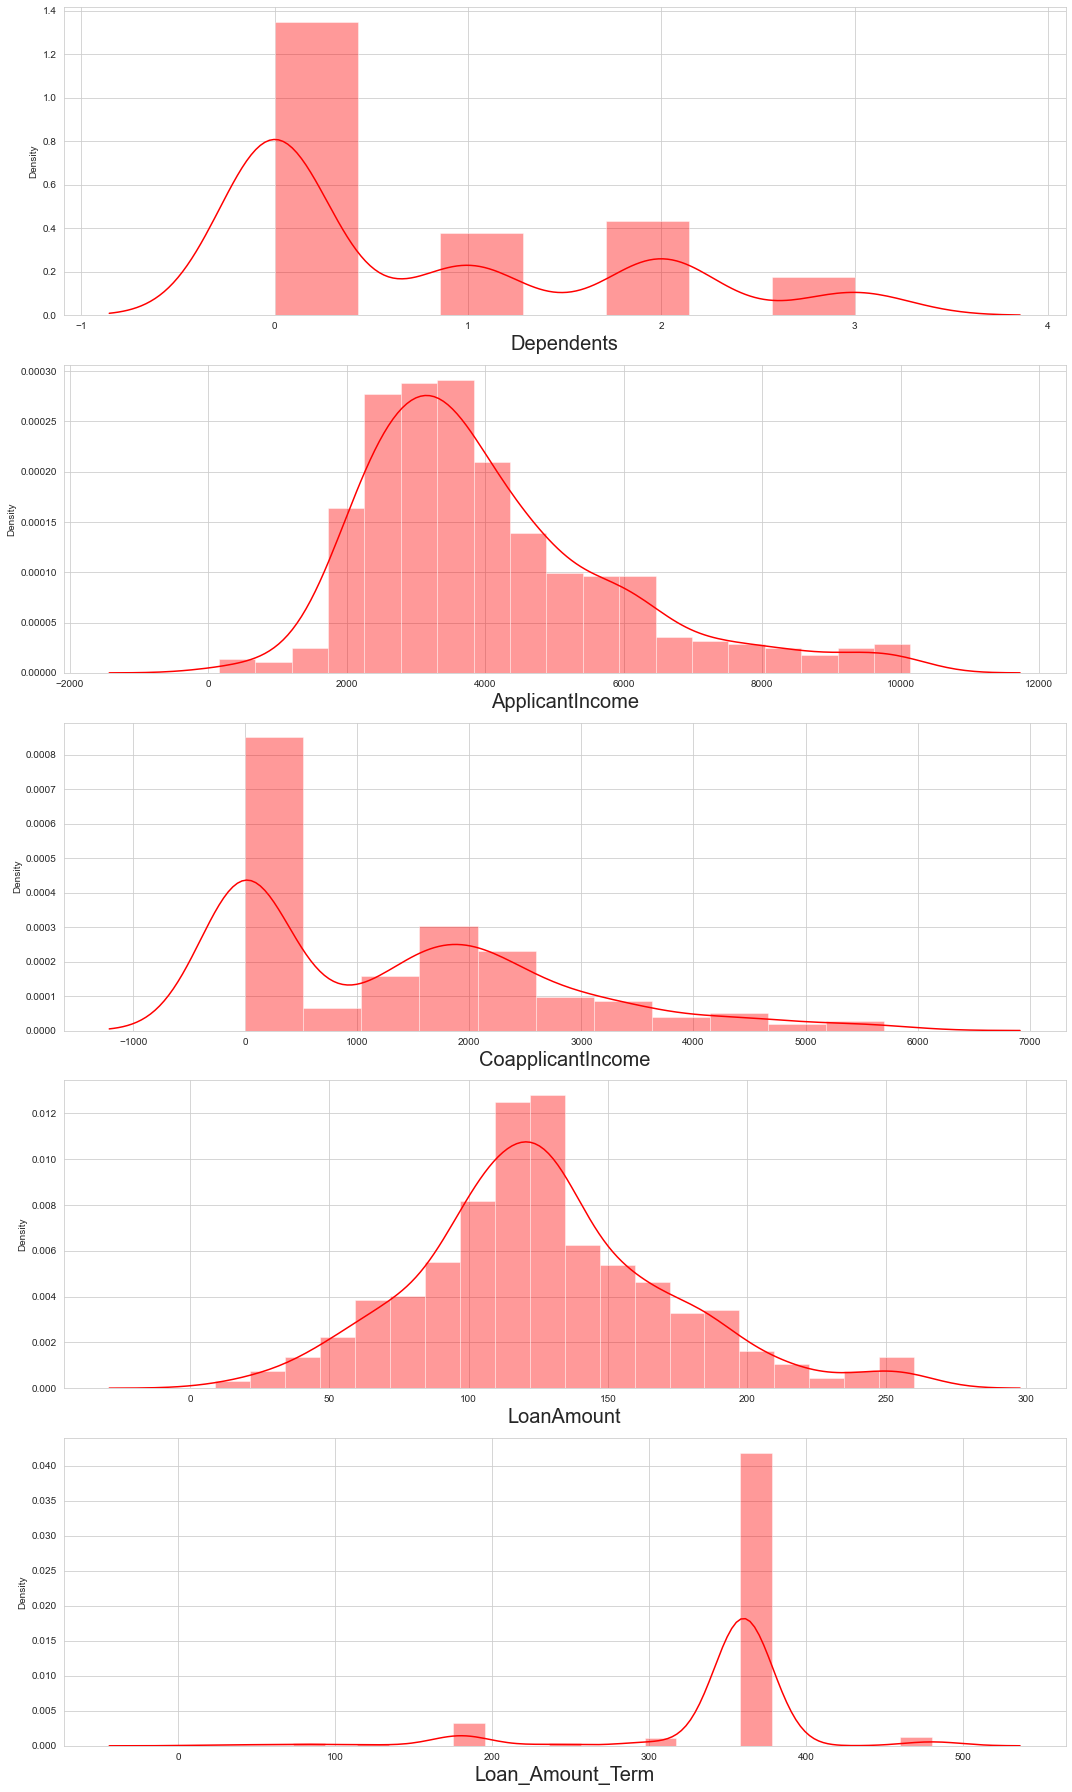

In [101]:
# for loop for distribution plot of continuous columns of the data
plt.figure(figsize = (15,25))
plotnumber = 1

for columns in df2:
    if plotnumber <= 5:
        ax = plt.subplot(5,1, plotnumber)
        sns.set_style('whitegrid')
        sns.distplot(df2[columns], color = 'red')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

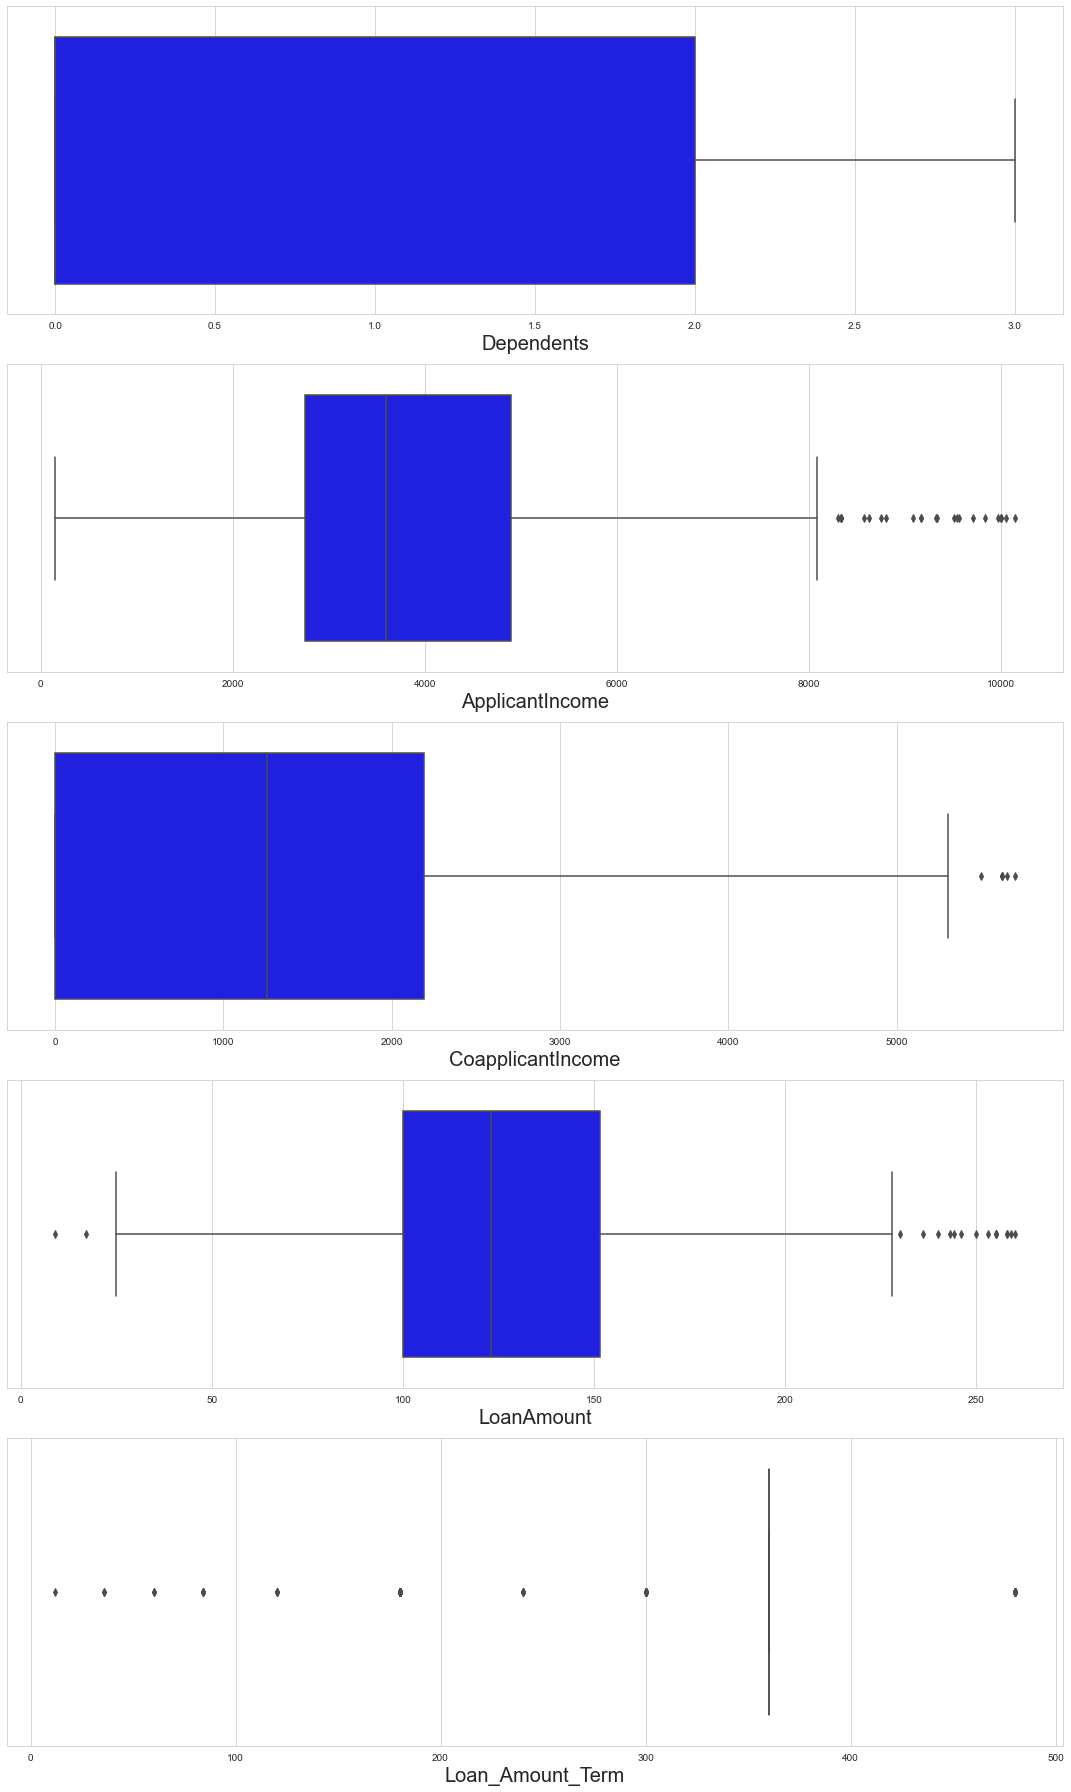

In [102]:
# for loop for the boxplot of the continuous column of the data
plt.figure(figsize = (15,25))
plotnumber = 1

for columns in df2:
    if plotnumber <= 5:
        ax = plt.subplot(5,1, plotnumber)
        sns.set_style('whitegrid')
        sns.boxplot(df2[columns], color = 'blue')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Distribution plot is showing that the data is much sorted comparatively the previous data. Little bit skewness is still there but previously the skewness was too much and now it's much sorted. BoxPlot is still showing some outliers and that is because previously the data was higly skewed towards right and when we removed the outlier data took reshape and in new shape the inter quantile range and mean standard deviation changed within the data after outlier removal and again some outlier has been created according to new formula but that is okay we already had loose 12% data so we are not going to remove the outliers again.

# Removing Skewness with PowerTransform

In [104]:
# splitting the data into features and Label
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [105]:
# removing skewness with power Transform yeo johnson method
x_new = power_transform(x, method = 'yeo-johnson')
x_new = pd.DataFrame(x_new, columns = x.columns)
x = x_new

In [107]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.502919,-1.364171,-0.841333,-0.569436,-0.378368,1.028040,-1.142445,0.135418,0.174508,0.443698,1.211606
1,0.502919,0.733046,0.815682,-0.569436,-0.378368,0.435358,0.742900,0.091093,0.174508,0.443698,-1.335005
2,0.502919,0.733046,-0.841333,-0.569436,2.642929,-0.493487,-1.142445,-1.414017,0.174508,0.443698,1.211606
3,0.502919,0.733046,-0.841333,1.756123,-0.378368,-0.793451,0.904663,-0.088307,0.174508,0.443698,1.211606
4,0.502919,-1.364171,-0.841333,-0.569436,-0.378368,1.092600,-1.142445,0.375702,0.174508,0.443698,1.211606
...,...,...,...,...,...,...,...,...,...,...,...
530,-1.988392,-1.364171,-0.841333,-0.569436,-0.378368,-0.562660,-1.142445,-1.280406,0.174508,0.443698,-1.335005
531,0.502919,0.733046,1.516930,-0.569436,-0.378368,0.182606,-1.142445,-2.165982,-2.295318,0.443698,-1.335005
532,0.502919,0.733046,0.815682,-0.569436,-0.378368,1.882693,0.144613,2.576475,0.174508,0.443698,1.211606
533,0.502919,0.733046,1.296265,-0.569436,-0.378368,1.710154,-1.142445,1.326309,0.174508,0.443698,1.211606


# Visualising the data again to check skewness

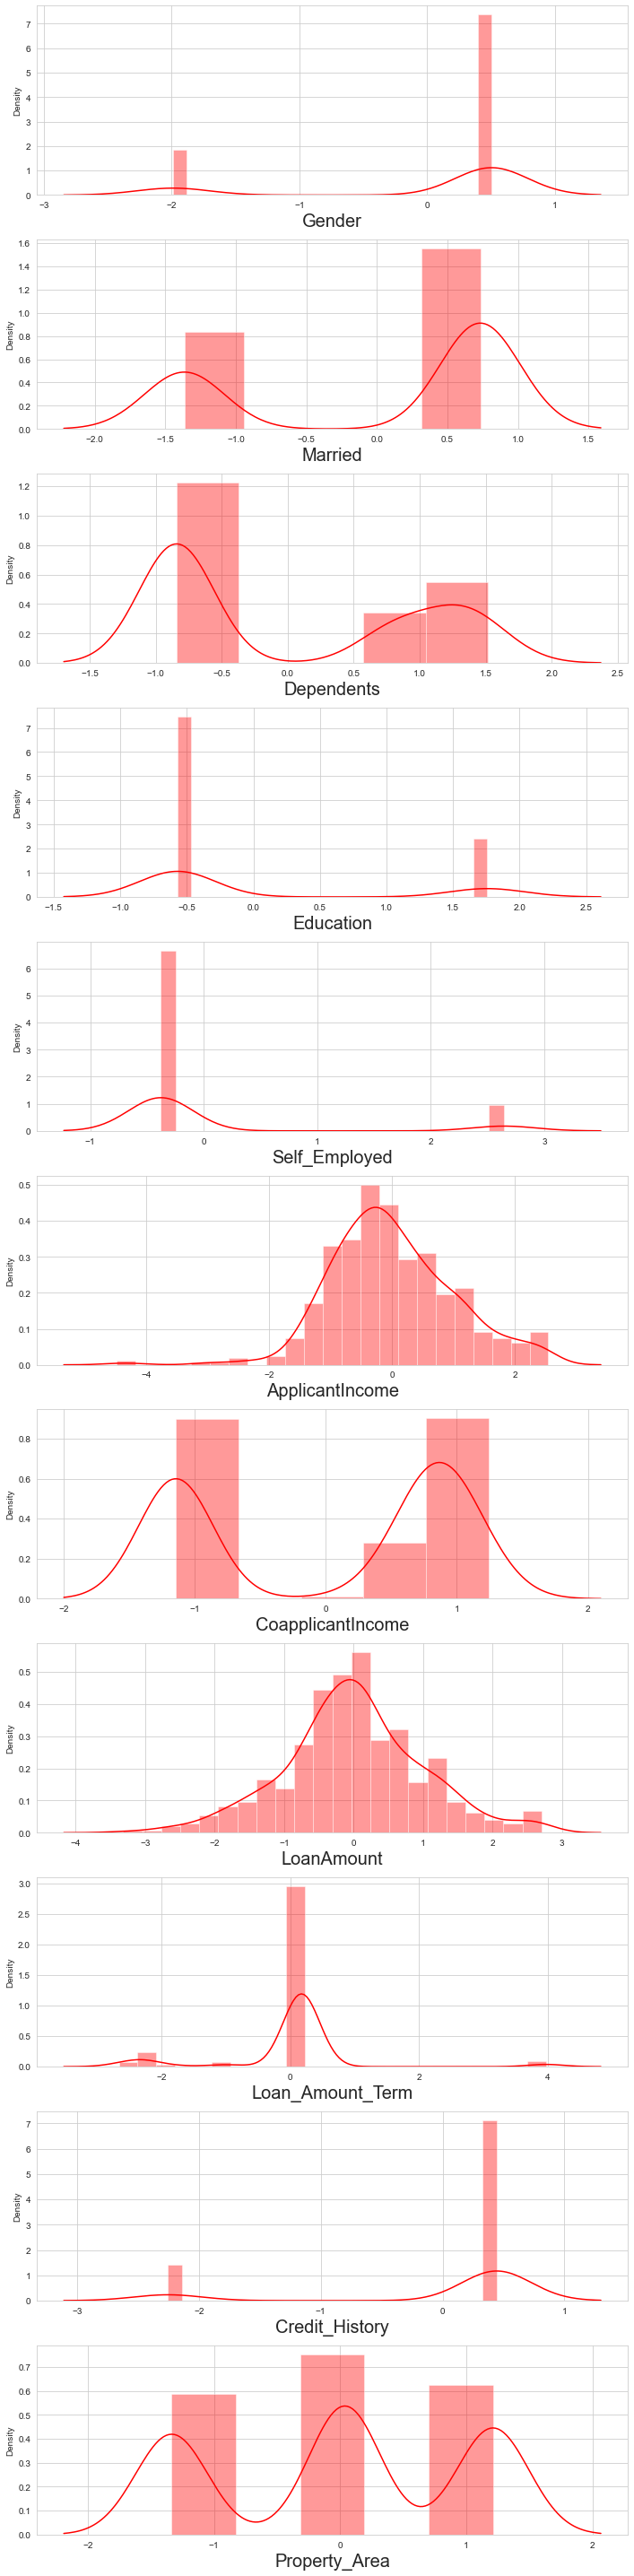

In [109]:
# for loop for distribution plot of continuous columns of the data
plt.figure(figsize = (10,40))
plotnumber = 1

for columns in x:
    if plotnumber <= 11:
        ax = plt.subplot(11,1, plotnumber)
        sns.set_style('whitegrid')
        sns.distplot(x[columns], color = 'red')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

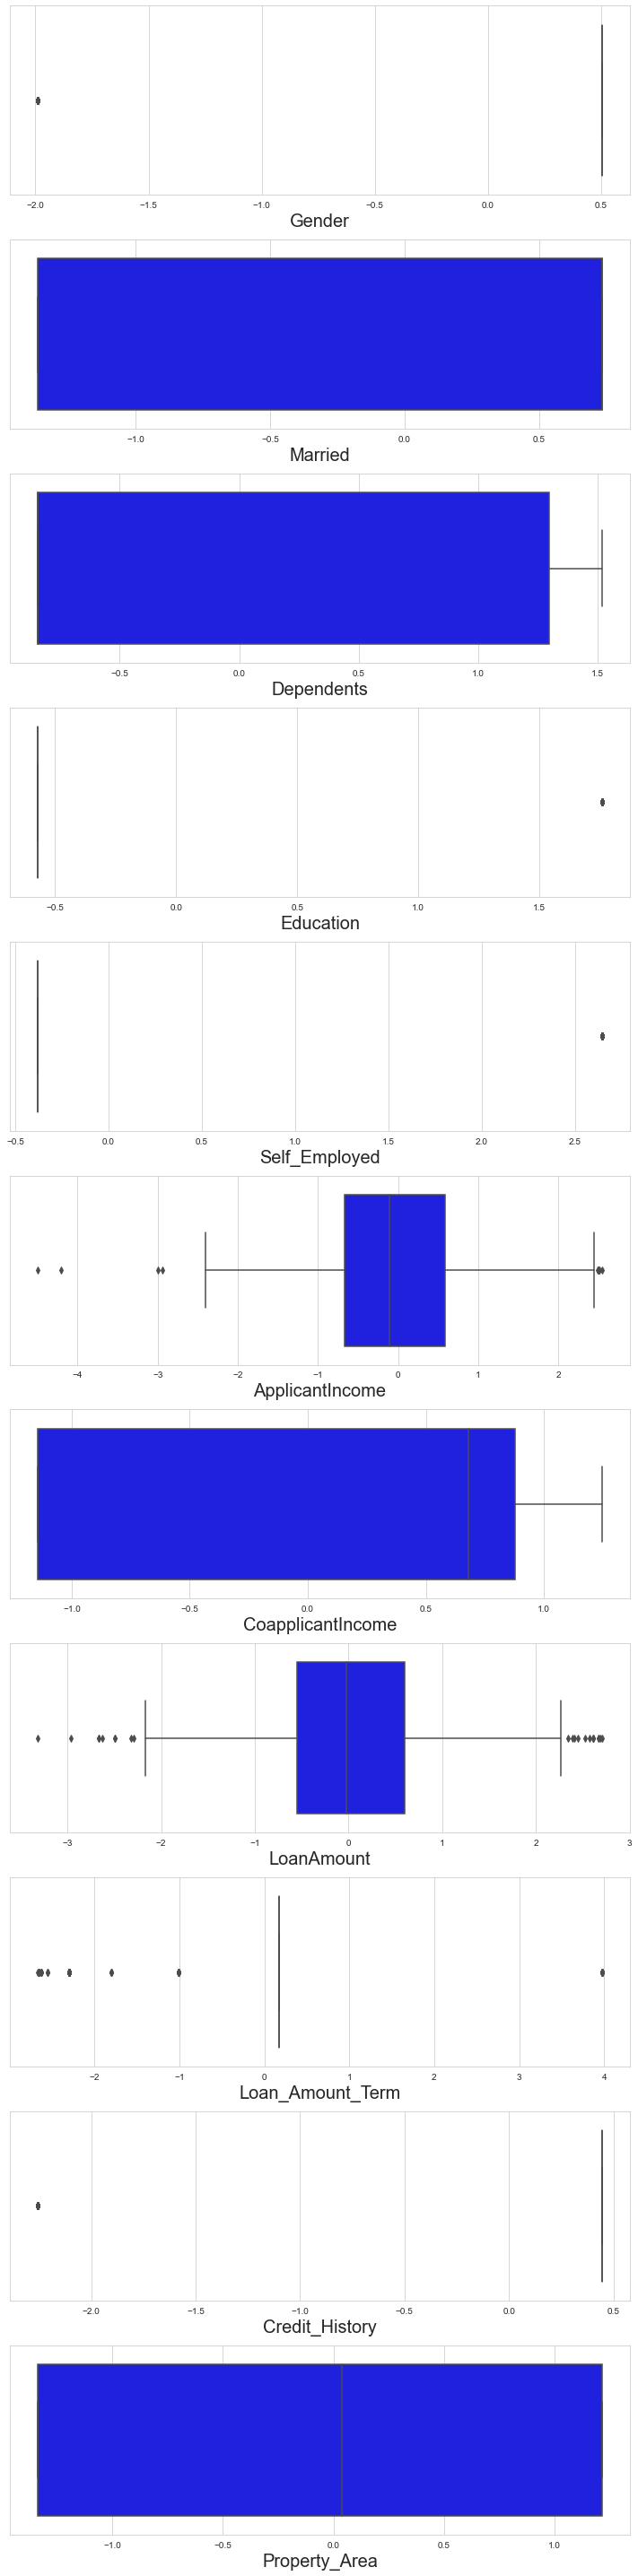

In [111]:
# for loop for the boxplot of the continuous column of the data
plt.figure(figsize = (10,40))
plotnumber = 1

for columns in x:
    if plotnumber <= 11:
        ax = plt.subplot(11,1, plotnumber)
        sns.set_style('whitegrid')
        sns.boxplot(x[columns], color = 'blue')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

We have apllied the power transfor to remove the skewness continuous columns but skewness is not removed, it did not do any good with contiuous column and also othe columns got disturbed. It seems like the previous data before applying the power transform was better to move ahead for model building so we are going with the previous. we will not consider the data in which power transform was applied.

Now we will standardise our column with minmax scaler and will go for model building from here.

# Data Scaling with Min-Max Scaler.

In [114]:
# spliting the data into features and Label
X = df.drop(columns = ['Loan_Status'])
Y = df['Loan_Status']

In [122]:
# scaling the data with minmax scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

## Finding the Best Random State

In [125]:
max_accu = 0
best_rs = 0

for i in range(1,2000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.25, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Maximum accuracy is ', max_accu, 'at random state ', best_rs)

Maximum accuracy is  0.9253731343283582 at random state  1101


We have the best random state 1101 which is giving the accuracy of 92.53%. The accuracy is good we will move ahead with the same random state to create the train test split.

## Creating Train Test Split

In [126]:
# creating train test and split for our model's training and testing

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.25, random_state = 1101)

Our Exploratery Data Analysis and Preprocessing part is done till here, we have created the train test split, found the best random State and scaled the feature data. Now we will start our model building process we will build 5 models for this data.
* Logistic Regression Model
* Knn Model
* Decision Tree Model
* Random Forest Model
* Support Vector Machine Model

After building the all 5 models we will cross validate it's accuracy and also will plot roc and auc curve to get best model for our data we will compare the minimum difference between model accuracy and cross validation score to the roc auc curve and will decide our best fit model accordingly.

# Machine Learning Model Building.

## Model 1 Logistic Regression

In [128]:
log_reg = LogisticRegression() # instantiating the model in a variable
log_reg.fit(x_train, y_train) # training the model
y_pred_log = log_reg.predict(x_test) # predicting the test data set after traing

# printing confusion matrix
print('Confusion matrix for Logistic Regression Model is :\n', confusion_matrix(y_test, y_pred_log))
# printing accuracy score
print('Accuracy Score of Logistic Regression Model is :\n', accuracy_score(y_test, y_pred_log))
# printing classification report
print('Classification report for Logistic Regression Model is :\n', classification_report(y_test, y_pred_log))

Confusion matrix for Logistic Regression Model is :
 [[ 18  10]
 [  0 106]]
Accuracy Score of Logistic Regression Model is :
 0.9253731343283582
Classification report for Logistic Regression Model is :
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.91      1.00      0.95       106

    accuracy                           0.93       134
   macro avg       0.96      0.82      0.87       134
weighted avg       0.93      0.93      0.92       134



## Model 2 K-Nearest Neighbors.

In [130]:
knn = KNeighborsClassifier() # instantiating the model in a variable
knn.fit(x_train, y_train) # training the model
y_pred_knn = knn.predict(x_test) # predicting the test data set after traing
# printing confusion matrix
print('Confusion Matrix for knn Model is :\n', confusion_matrix(y_test, y_pred_knn))
# printing accuracy score
print('Accuracy Score for knn Model is :\n', accuracy_score(y_test, y_pred_knn))
# printing classification report
print('Classification Report for knn Model is :\n', classification_report(y_test, y_pred_knn))

Confusion Matrix for knn Model is :
 [[ 19   9]
 [  6 100]]
Accuracy Score for knn Model is :
 0.8880597014925373
Classification Report for knn Model is :
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.92      0.94      0.93       106

    accuracy                           0.89       134
   macro avg       0.84      0.81      0.82       134
weighted avg       0.88      0.89      0.89       134



## Model 3 Decision Tree Classification.

In [131]:
DT = DecisionTreeClassifier() # instantiating the model in a variable
DT.fit(x_train, y_train) # training the model
y_pred_dt = DT.predict(x_test) # predicting the test data set after traing
# printing confusion matrix
print('Confusion Matrix for Decision Tree Model is :\n', confusion_matrix(y_test, y_pred_dt))
# printing accuracy score
print('Accuracy Score for Decision Tree Model is :\n', accuracy_score(y_test, y_pred_dt))
# printing classification report
print('Classification Report for Decision Tree Model is :\n', classification_report(y_test, y_pred_dt))

Confusion Matrix for Decision Tree Model is :
 [[20  8]
 [21 85]]
Accuracy Score for Decision Tree Model is :
 0.7835820895522388
Classification Report for Decision Tree Model is :
               precision    recall  f1-score   support

           0       0.49      0.71      0.58        28
           1       0.91      0.80      0.85       106

    accuracy                           0.78       134
   macro avg       0.70      0.76      0.72       134
weighted avg       0.82      0.78      0.80       134



## Model 4 Random Forest Classification.

In [132]:
RF = RandomForestClassifier() # instantiating the model in a variable
RF.fit(x_train, y_train) # training the model
y_pred_rf = RF.predict(x_test)  # predicting the test data set after traing
# printing confusion matrix
print('Confusion Matrix for Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rf))
# printing accuracy score
print('Accuracy Score for Random Forest Model is :\n,', accuracy_score(y_test, y_pred))
# printing classification report
print('Classificatio Report for Random Forest Model is :\n', classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest Model is :
 [[ 18  10]
 [  3 103]]
Accuracy Score for Random Forest Model is :
, 0.7164179104477612
Classificatio Report for Random Forest Model is :
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.91      0.97      0.94       106

    accuracy                           0.90       134
   macro avg       0.88      0.81      0.84       134
weighted avg       0.90      0.90      0.90       134



## Model 5 Support Vector Machine Classification.

In [133]:
svc = SVC() # instantiating the model in a variable
svc.fit(x_train, y_train) # training the model
y_pred_svc = svc.predict(x_test)  # predicting the test data set after traing
# printing confusion matrix
print('Confusion Matrix for Support Vector Model is :\n', confusion_matrix(y_test, y_pred_svc))
# printing accuracy score
print('Accuracy Score for Support Vector Model is :\n', accuracy_score(y_test, y_pred_svc))
# printing classification report
print('Classification Report for Support Vector model is :\n', classification_report(y_test, y_pred_svc))

Confusion Matrix for Support Vector Model is :
 [[ 18  10]
 [  0 106]]
Accuracy Score for Support Vector Model is :
 0.9253731343283582
Classification Report for Support Vector model is :
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.91      1.00      0.95       106

    accuracy                           0.93       134
   macro avg       0.96      0.82      0.87       134
weighted avg       0.93      0.93      0.92       134



We have built 5 Classification Machine Learning Algorithm and there score is as follows:-

 * **LogisticRegression Model**  Accuracy Score = ```0.9253731343283582```
 * **k-NearestNeighbors Model**  Accuracy Score = ```0.8880597014925373```
 * **DecisionTree Model**  Accuracy Score = ```0.7835820895522388```
 * **RandomForest Model**  Accuracy Score = ```0.7164179104477612```
 * **SupportVector Model**  Accuracy Score = ```0.9253731343283582```
 
All the 5 models have given the good accuracy score, out of which the **Ligistic Regression** & **Support Vector Machine** has given the highest accuracy that is 92.53% and **Random Forest** has given the lowest score that is 71.64%. 

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model but to be finalized we will also look for ROC AUC Curve.

# Cross Validation of Models

In [144]:
# cross validation mean score for Logistic Regression with cv = 20
cvs = cross_val_score(log_reg, x_scaled, Y, cv = 20)
print('Cross Validation Mean Score of Logistic Regression is :', cvs.mean())

Cross Validation Mean Score of Logistic Regression is : 0.8413105413105413


In [149]:
# cross validation mean score for K-NearestNeighbors with cv = 20
cvs = cross_val_score(knn, x_scaled, Y, cv = 20)
print('Cross Validation Mean Score of K-Nearest Neighbors is :', cvs.mean())

Cross Validation Mean Score of K-Nearest Neighbors is : 0.8168803418803419


In [162]:
# cross validation mean score for Decision Tree with cv = 20
cvs = cross_val_score(DT, x_scaled, Y, cv = 20)
print('Cross Validation Mean Score of Decision Tree is :', cvs.mean())

Cross Validation Mean Score of Decision Tree is : 0.7626780626780627


In [166]:
# cross validation mean score for Random Forest with cv = 20
cvs = cross_val_score(RF, x_scaled, Y, cv = 20)
print('Cross Validation Mean Score of Random Forest is :', cvs.mean())

Cross Validation Mean Score of Random Forest is : 0.8317663817663818


In [170]:
# cross validation mean score for Logistic Regression with cv = 20
cvs = cross_val_score(svc, x_scaled, Y, cv = 20)
print('Cross Validation Mean Score of Support Vector Machine is :', cvs.mean())

Cross Validation Mean Score of Support Vector Machine is : 0.8413105413105413


We have successfully done with cross validation of all 5 models with **CV = 20** and got the result as follows:-

 * **LogisticRegression Model**  Cross Validation Score = ```0.8413105413105413```
 * **k-NearestNeighbors Model**  Cross Validation Score = ```0.8168803418803419```
 * **DecisionTree Model**  Cross Validation Score = ```0.7626780626780627```
 * **RandomForest Model**  Cross Validation Score = ```0.8317663817663818```
 * **SupportVector Model**  Cross Validation Score = ```0.8413105413105413```
 
Now one thing is sure that ***Logistic Regression & Support Vector Machine*** Machine learning algorithm has given the best score in both ```accuracy_score``` and ```cross_val_score``` and are performing same in each case. Also one thing is to be noticed here that Random Forest Model has given cross validation score is significantly high from the trained Model, Random Forest's Model accuracy was 71.64% but the cross validation score is 83.17% which is more than 11% higher. Now we will check for the difference between ```accuracy_score``` and ```cross_val_score```, and whichever model has the minimum difference between ```accuracy_score``` and ```cross_val_score``` would be the best model. So to check that I have counted the difference of both on a excel sheet. The result is as follows:
						
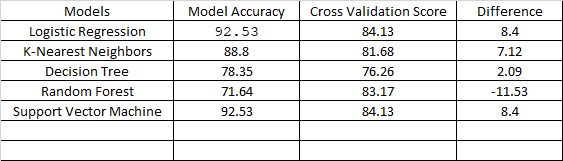

from this table we can see that cross validation Average of ***Random Forest*** with cv = 20 has performed even better than the actual model and thus it has difference in negetive(-11.53) means cross validation average score is even more than the actual model, by which we can interpret that our original model of random forest was underfit So according to this theory our best fit model is ***Random Forest Classifier***.

We are going to plot the ```roc_auc_curve``` for our models then we will find out which model has largest ```roc_auc_score``` and if it matches with ***Random Forest Classifier*** we will finalize ***Random Forest Classifier*** as our final model and if it would be ***Logistic Regression or Support Vector*** than we will finalise one from  ***Logistic Regression or Support Vector*** as our final model.

# AUC & ROC Curve.

<function matplotlib.pyplot.show(close=None, block=None)>

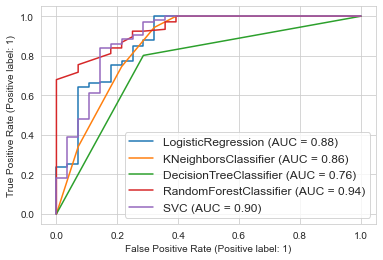

In [171]:
# plotting the AUC & ROC curve to find the best model
disp = plot_roc_curve(log_reg, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size': 12}, loc = 'lower right')
plt.show

Great! we have successfully ploted the ```roc_auc_curve``` and got the AUC score for all the models. We can see that ```RandomForestClassifier``` has highest AUC score 94%. Before ploting the ```roc_auc_curve``` we already had a analysis of best model based on cross validation score difference with accuracy score and we got that ```RandomForestClassifier``` had the negative difference which was making it the best model among all and now it has the highest AUC score as well, so we are going to select our best model is ```Random Forest Classifier``` based on ```auc_roc_curve``` and minimum difference between accuracy score & cross validation score. 


Now we will do some Hyperparameter tuning with ```Random Forest``` model to see if we can get the more accuracy with this model if possible. 

# Hyper Parameter Tuning.

In [174]:
# defining all the important estimators of Random Forest for tuning the Random Forest algorithm.
params = {'n_estimators' : [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
          'criterion' : ['gini', 'entropy'],
          'max_depth' : [2,4,6,8,10,12],
          'max_features' : ['auto', 'sqrt', 'log2'],
          'min_samples_split' : [2,4,6,8,10,12,14],
          'min_samples_leaf' : [1,3,5,7,9,11,13]
          }

In [175]:
# Training the Grid Search with defined estimators to get the best estimators for the model to increase the accuracy
grid_search = GridSearchCV(estimator = RF, param_grid = params, cv = 5, n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100]})

In [176]:
# Getting best estimators after the tuning of the model
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 10}

In [177]:
# training and testing the tuned Random Forest model with best estimators.
RFHT = grid_search.best_estimator_
RFHT.fit(x_train, y_train)
y_pred_rfht = RFHT.predict(x_test)
print('Confusion Matrix of Tuned Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rfht))
print('Accuracy Score of Tuned Random Forest Model is :\n', accuracy_score(y_test, y_pred_rfht))
print('Classification Report of Tuned Random Forest Model is :\n', classification_report(y_test, y_pred_rfht))

Confusion Matrix of Tuned Random Forest Model is :
 [[ 18  10]
 [  0 106]]
Accuracy Score of Tuned Random Forest Model is :
 0.9253731343283582
Classification Report of Tuned Random Forest Model is :
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.91      1.00      0.95       106

    accuracy                           0.93       134
   macro avg       0.96      0.82      0.87       134
weighted avg       0.93      0.93      0.92       134



we have done with the Hyper Parameter Tuning with some great productivity as we increased our accuracy score by approximately 21% which is very significant as the previous score was on 71.64 but after tuning the parameters it significantly increased upto 92.53%. Which is too great.

So we have done with our model building and we have ended up finalizing the  ```Random Forest Classifier Model``` for our **Loan Prediction Project**. Now we will save the model and after that our project is ready.

# Model Saving

In [179]:
# saving the model with Pickle
filename = 'Loan Prediction Use Case Machine Learning Model'
pickle.dump(RFHT, open(filename, 'wb'))

Model has been Saved successfully.

# Loading and Predicting with Loaded Model & Conclusion.

In [180]:
# Loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))
Prediction = loaded_model.predict(x_test)    # predicting with the loaded model

In [181]:
Actual = y_test

## Conclusion

In [182]:
# making a data frame of predicted values and actual values for comparision
DF = pd.DataFrame([Prediction, Actual], index = ['Prediction', 'Actual'])
DF

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
Prediction,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Actual,1,0,1,0,1,1,0,1,1,0,...,1,1,1,0,0,1,0,1,1,1


# Finished.
We have saved the model and predicted the test dataset with the Loaded Model. Than we have made a Data Frame of the Actual values and Predicted values with the loaded for a conclusion. Here we have finished the Model Building.
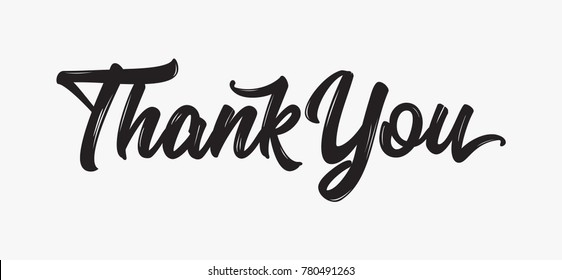